In [154]:
#Importing the libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime
import time
from ipywidgets import widgets
from IPython.display import display

In [155]:
data = pd.read_csv('../twitter_data.csv')
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S')
data.shape[0] - data.dropna().shape[0]
camp1 = data[data['campaign_id']==1]
camp2 = data[data['campaign_id']==2]

In [156]:
camp1.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid
362,2018-04-23 08:57:08.925000,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
371,2018-04-23 08:58:28.159720,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
376,2018-04-23 08:59:18.955240,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
377,2018-04-23 08:59:23.448840,1,0.012214,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5
378,2018-04-23 08:59:32.645960,1,0.000000,500.0,GEO,WEBSITE_CLICKS,0.0,False,7.5


In [157]:
camp2.head()

,datetime,campaign_id,campaign_spend,campaign_budget,matched_targeting,objective,charged,seen_by_user,bid
14930,2018-04-23 10:52:40.949,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15128,2018-04-23 10:53:29.333,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15338,2018-04-23 10:54:20.200,2,85.842301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15
15393,2018-04-23 10:54:34.112,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,True,1.15
15458,2018-04-23 10:54:52.198,2,86.992301,3550.0,"['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']",WEBSITE_CLICKS,0.0,False,1.15


Text(0.5,1,'Campaign 1 Pacing')

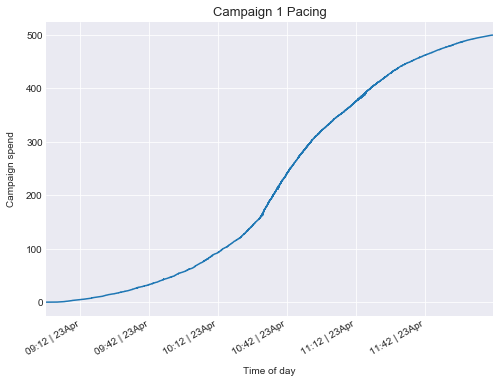

In [158]:
sns.set_style("darkgrid")
ax = camp1.plot(x='datetime',y='campaign_spend',figsize=(8,6))
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign spend")
ax.legend_.remove()
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Campaign 1 Pacing',fontsize=13)

Text(0.5,1,'Campaign 2 Pacing')

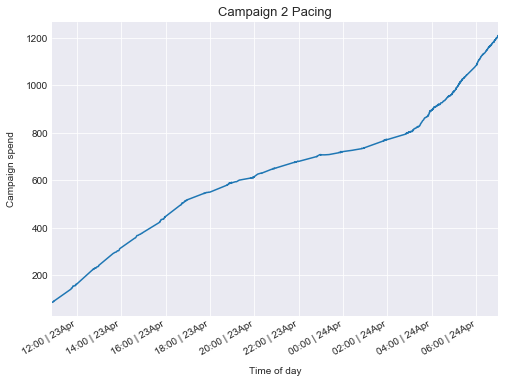

In [159]:
sns.set_style("darkgrid")
ax = camp2.plot(x='datetime',y='campaign_spend',figsize=(8,6))
myFmt = mdates.DateFormatter('%H:%M | %d%b')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time of day")
ax.set_ylabel("Campaign spend")
ax.legend_.remove()
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_title('Campaign 2 Pacing',fontsize=13)

In [160]:
camp1seen = camp1[camp1['seen_by_user']==True]
camp2seen = camp2[camp2['seen_by_user']==True]
camp1charged = camp1[camp1['charged']>0.0]
camp2charged = camp2[camp2['charged']>0.0]

In [161]:
print('Engagement rate campaign 1 : '+str(100*len(camp1charged.index)/len(camp1seen.index))+'%')

Engagement rate campaign 1 : 3.8461538461538463%


In [162]:
print('Engagement rate campaign 2 : '+str(100*len(camp2charged.index)/len(camp2seen.index))+'%')

Engagement rate campaign 2 : 0.6060606060606061%


In [163]:
camp1.iloc[0][['matched_targeting','bid']]
print('Campaign 1')
print('targeting : '+str(camp1.iloc[0]['matched_targeting']))
print('bid : '+str(camp1.iloc[0]['bid']))

Campaign 1
targeting : GEO
bid : 7.5


In [164]:
camp2.iloc[0][['matched_targeting','bid']]
print('Campaign 2')
print('targeting : '+str(camp2.iloc[0]['matched_targeting']))
print('bid : '+str(camp2.iloc[0]['bid']))

Campaign 2
targeting : ['GEO', 'AGE_BUCKET', 'LANGUAGE', 'GENDER']
bid : 1.15


In [165]:
appinstall = data[data['objective']=='APP_INSTALLS']
vidview    = data[data['objective']=='VIDEO_VIEWS']
webclick   = data[data['objective']=='WEBSITE_CLICKS']
print('Campaigns and Objectives')
print('App Install :'+str(appinstall['campaign_id'].unique()))
print('Video Views :'+str(vidview['campaign_id'].unique()))
print('Website Clicks :'+str(webclick['campaign_id'].unique()))

Campaigns and Objectives
App Install :[4 3]
Video Views :[7 6 5]
Website Clicks :[1 2]


In [166]:
ob1 = appinstall[['campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob1.set_value(3,'engagement',100*len(appinstall[(appinstall['charged']>0.0) & (appinstall['campaign_id']==3)].index)/len(appinstall[(appinstall['seen_by_user']==True) & (appinstall['campaign_id']==3)].index))
ob1.set_value(4,'engagement',100*len(appinstall[(appinstall['charged']>0.0) & (appinstall['campaign_id']==4)].index)/len(appinstall[(appinstall['seen_by_user']==True) & (appinstall['campaign_id']==4)].index))
ob1['objective'] = 'App Install'

In [167]:
ob2 = vidview[['campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob2.set_value(5,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==5)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==5)].index))
ob2.set_value(6,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==6)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==6)].index))
ob2.set_value(7,'engagement',100*len(vidview[(vidview['charged']>0.0) & (vidview['campaign_id']==7)].index)/len(vidview[(vidview['seen_by_user']==True) & (vidview['campaign_id']==7)].index))
ob2['objective'] = 'Video View'

In [168]:
ob3 = webclick[['objective','campaign_id','bid','campaign_budget']].groupby('campaign_id').agg('mean')
ob3.set_value(1,'engagement',100*len(webclick[(webclick['charged']>0.0) & (webclick['campaign_id']==1)].index)/len(webclick[(webclick['seen_by_user']==True) & (webclick['campaign_id']==1)].index))
ob3.set_value(2,'engagement',100*len(webclick[(webclick['charged']>0.0) & (webclick['campaign_id']==2)].index)/len(webclick[(webclick['seen_by_user']==True) & (webclick['campaign_id']==2)].index))
ob3['objective'] = 'Website Click'

In [169]:
frames = [ob1,ob2,ob3]
res = pd.concat(frames)
res.reset_index(inplace=True)

Text(0,0.5,'Bid')

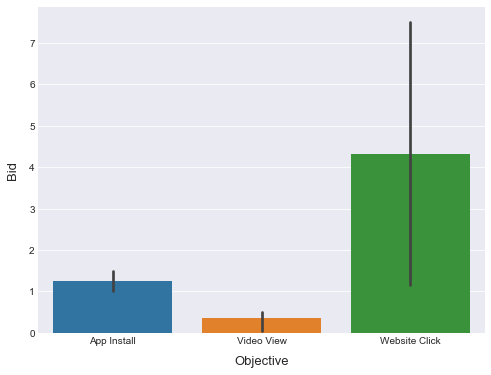

In [170]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='bid', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Bid',fontsize=13)

Text(0,0.5,'Engagement (%)')

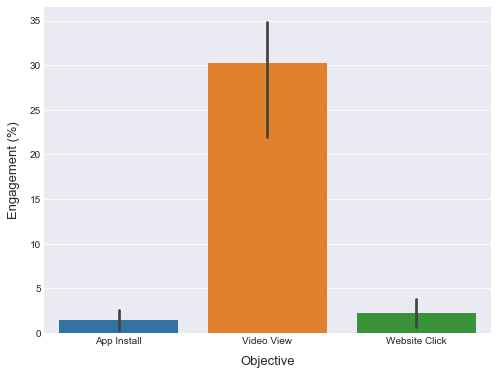

In [171]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='engagement', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Engagement (%)',fontsize=13)

Text(0,0.5,'Campaign Budget')

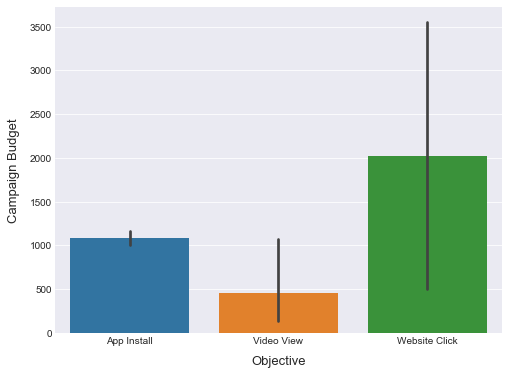

In [172]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='objective', y='campaign_budget', data=res)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.set_xlabel('Objective',fontsize=13)
ax.set_ylabel('Campaign Budget',fontsize=13)

In [14]:
appinseen = appinstall[appinstall['seen_by_user']==True]
vidviewseen = vidview[vidview['seen_by_user']==True]
webclickseen = webclick[webclick['seen_by_user']==True]
appincharged = appinseen[appinseen['charged']>0.0]
vidviewcharged = vidviewseen[vidviewseen['charged']>0.0]

In [15]:
100*len(appincharged.index)/len(appinseen.index)

0.7371007371007371

In [16]:
100*len(vidviewcharged.index)/len(vidviewseen.index)

32.93436293436294

In [17]:
appinbid = appinstall[['objective','bid','campaign_budget']]
appinbid.groupby('objective').agg('mean')

,bid,campaign_budget
objective,,
APP_INSTALLS,1.213203,1095.790207


In [18]:
vidviewbid = vidview[['objective','bid','campaign_budget']]
vidviewbid.groupby('objective').agg('mean')

,bid,campaign_budget
objective,,
VIDEO_VIEWS,0.437544,759.117536


In [19]:
100*len(appinseen.index)/len(appinstall.index)

5.261797026502909

In [20]:
100*len(vidviewseen.index)/len(vidview.index)

21.245180871134444

In [21]:
100*len(webclickseen.index)/len(webclick.index)

12.881630250864415